In [2]:
import os
dirname = os.path.dirname(os.getcwd())
path = os.path.join(dirname, 'FIFA-13-EDA---Constenla---Depascuali/media/fifa_23_280922.csv')
os.getcwd()

'/Users/tomasdepascuali/Documents/GitHub/FIFA-13-EDA---Constenla---Depascuali'

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

df = pd.read_csv(path)
df.describe

<bound method NDFrame.describe of                   Nom  Général  Potentiel  Performance                 Pays  \
0           K. Mbappé       91         95         93.0               France   
1      R. Lewandowski       91         91         91.0               Poland   
2          K. Benzema       91         91         91.0               France   
3            L. Messi       91         91         91.0            Argentina   
4        K. De Bruyne       91         91         91.0              Belgium   
...               ...      ...        ...          ...                  ...   
18441       Huo Liang       49         49         49.0             China PR   
18442      Zhou Zheng       46         51         48.5             China PR   
18443        N. Rabha       47         50         48.5                India   
18444        Ning Hao       48         48         48.0             China PR   
18445        D. Duffy       35         49         42.0  Republic of Ireland   

                 

In [4]:
df.dtypes

Nom                      object
Général                   int64
Potentiel                 int64
Performance             float64
Pays                     object
Club                     object
Bon pied                 object
Mauvais pied              int64
Gestes techniques         int64
Taille                    int64
Rendement offensif       object
Rendement defensif       object
Valeur                   object
Salaire                  object
Id                        int64
Centres                   int64
Finition                  int64
Precision tete            int64
Passes courtes            int64
Volee                     int64
Dribbles                  int64
Effet                     int64
PCF                       int64
Passes longues            int64
Controle                  int64
Acceleration              int64
Vitesse                   int64
Agilite                   int64
Reactivite                int64
Equilibre                 int64
Puissance frappe          int64
Detente 

In [5]:
df.drop(['Id', 'Salaire'], axis=1, inplace=True)

In [6]:
df.count()

Nom                     18446
Général                 18446
Potentiel               18446
Performance             18446
Pays                    18446
Club                    18446
Bon pied                18446
Mauvais pied            18446
Gestes techniques       18446
Taille                  18446
Rendement offensif      18446
Rendement defensif      18446
Valeur                  18446
Centres                 18446
Finition                18446
Precision tete          18446
Passes courtes          18446
Volee                   18446
Dribbles                18446
Effet                   18446
PCF                     18446
Passes longues          18446
Controle                18446
Acceleration            18446
Vitesse                 18446
Agilite                 18446
Reactivite              18446
Equilibre               18446
Puissance frappe        18446
Detente                 18446
Endurance               18446
Force                   18446
Tirs de loin            18446
Agressivit

In [9]:
df = df.rename(columns={"Nom":"Nombre","Général":"General","Potentiel":"Potencial","Pays":"Pais","Bon pied":"Pierna buena","Mauvais pied":"Pierna mala","Gestes techniques":"Gestos tecnicos","Taille":"Altura","Rendement offensif":"Rendimiento ofensivo","Rendement defensif":"Rendimiento defensivo","Valeur":"Valor","Centres":"Centros","Finition":"Definicion","Precision tete":"Precision de cabeza","Passes courtes":"Pase corto","Volee":"Volea","Dribbles":"Dribbling","Effet":"Efecto","PCF":"Precision tiros libres","Passes longues":"Pase largo","Controle":"Control","Acceleration":"Acceleracion","Vitesse": "Velocidad", "Agilite": "Agilidad", "Reactivite": "Reactividad", "Equilibre": "Equilibrio", "Puissance frappe": "Potencia", "Detente": "Recuperacion", "Endurance": "Resistencia", "Force": "Fuerza", "Tirs de loin": "Disparo desde lejos", "Agressivite": "Agresividad", "Interceptions": "Intercepciones", "Placement": "Posicionamiento", "Vista": "Visión", "Penalty": "Penales", "Calme": "Calma", "Conscience defensive": "Consciencia defensiva", "Tacle debout": "Entradas","Tacle glisse": "Entradas por el suelo", "Plongeon": "Tapadas", "Jeu main": "Juego de mano", "Jeu pied": "Juego con el pie", "Placement.1": "Posicionamiento del arquero", "Reflexes": "Reflejos"})
df.head(5)

,Nombre,General,Potencial,Performance,Pais,Club,Pierna buena,Pierna mala,Gestos tecnicos,Altura,...,Penales,Calma,Consciencia defensiva,Entradas,Entradas por el suelo,Tapadas,Juego de mano,Juego con el pie,Posicionamiento del arquero,Reflejos
0,K. Mbappé,91,95,93.0,France,Paris Saint-Germain,Right,4,5,182,...,80,88,26,34,32,13,5,7,11,6
1,R. Lewandowski,91,91,91.0,Poland,FC Barcelona,Right,4,4,185,...,90,88,35,42,19,15,6,12,8,10
2,K. Benzema,91,91,91.0,France,Real Madrid CF,Right,4,4,185,...,84,90,43,24,18,13,11,5,5,7
3,L. Messi,91,91,91.0,Argentina,Paris Saint-Germain,Left,4,4,169,...,75,96,20,35,24,6,11,15,14,8
4,K. De Bruyne,91,91,91.0,Belgium,Manchester City,Right,5,4,181,...,83,89,68,65,53,15,13,5,10,13


In [11]:
top = df['Pais'].value_counts().head(10)
top

England          1616
Germany          1200
Spain            1063
France            948
Argentina         933
Brazil            714
Italy             620
China PR          446
United States     434
Netherlands       422
Name: Pais, dtype: int64

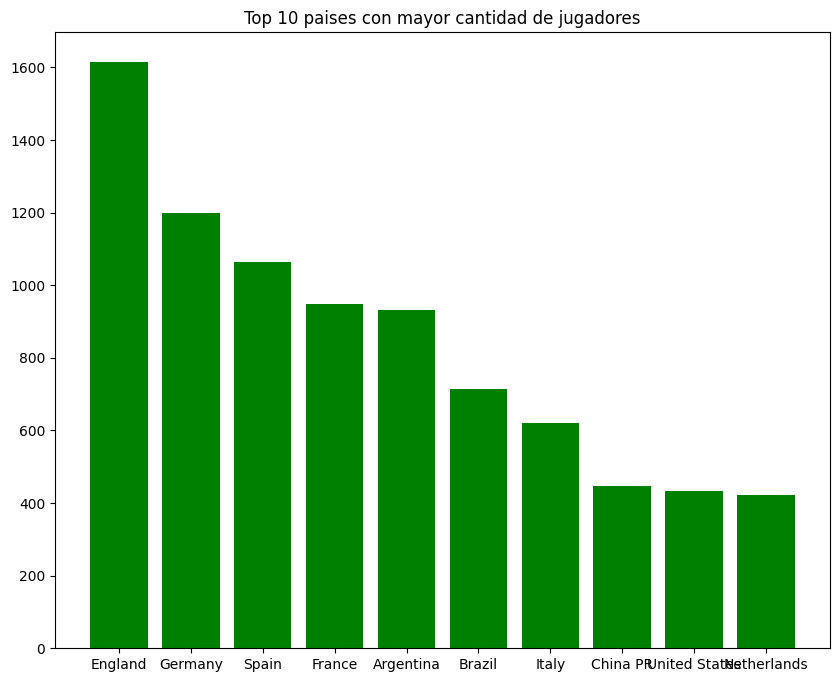

In [12]:
fig,ax = plt.subplots(figsize = (10,8))
ar = top.values
ra = top.index
ax.bar(ra,ar, color = 'green')
ax.set_title(('Top 10 paises con mayor cantidad de jugadores'))
plt.show()

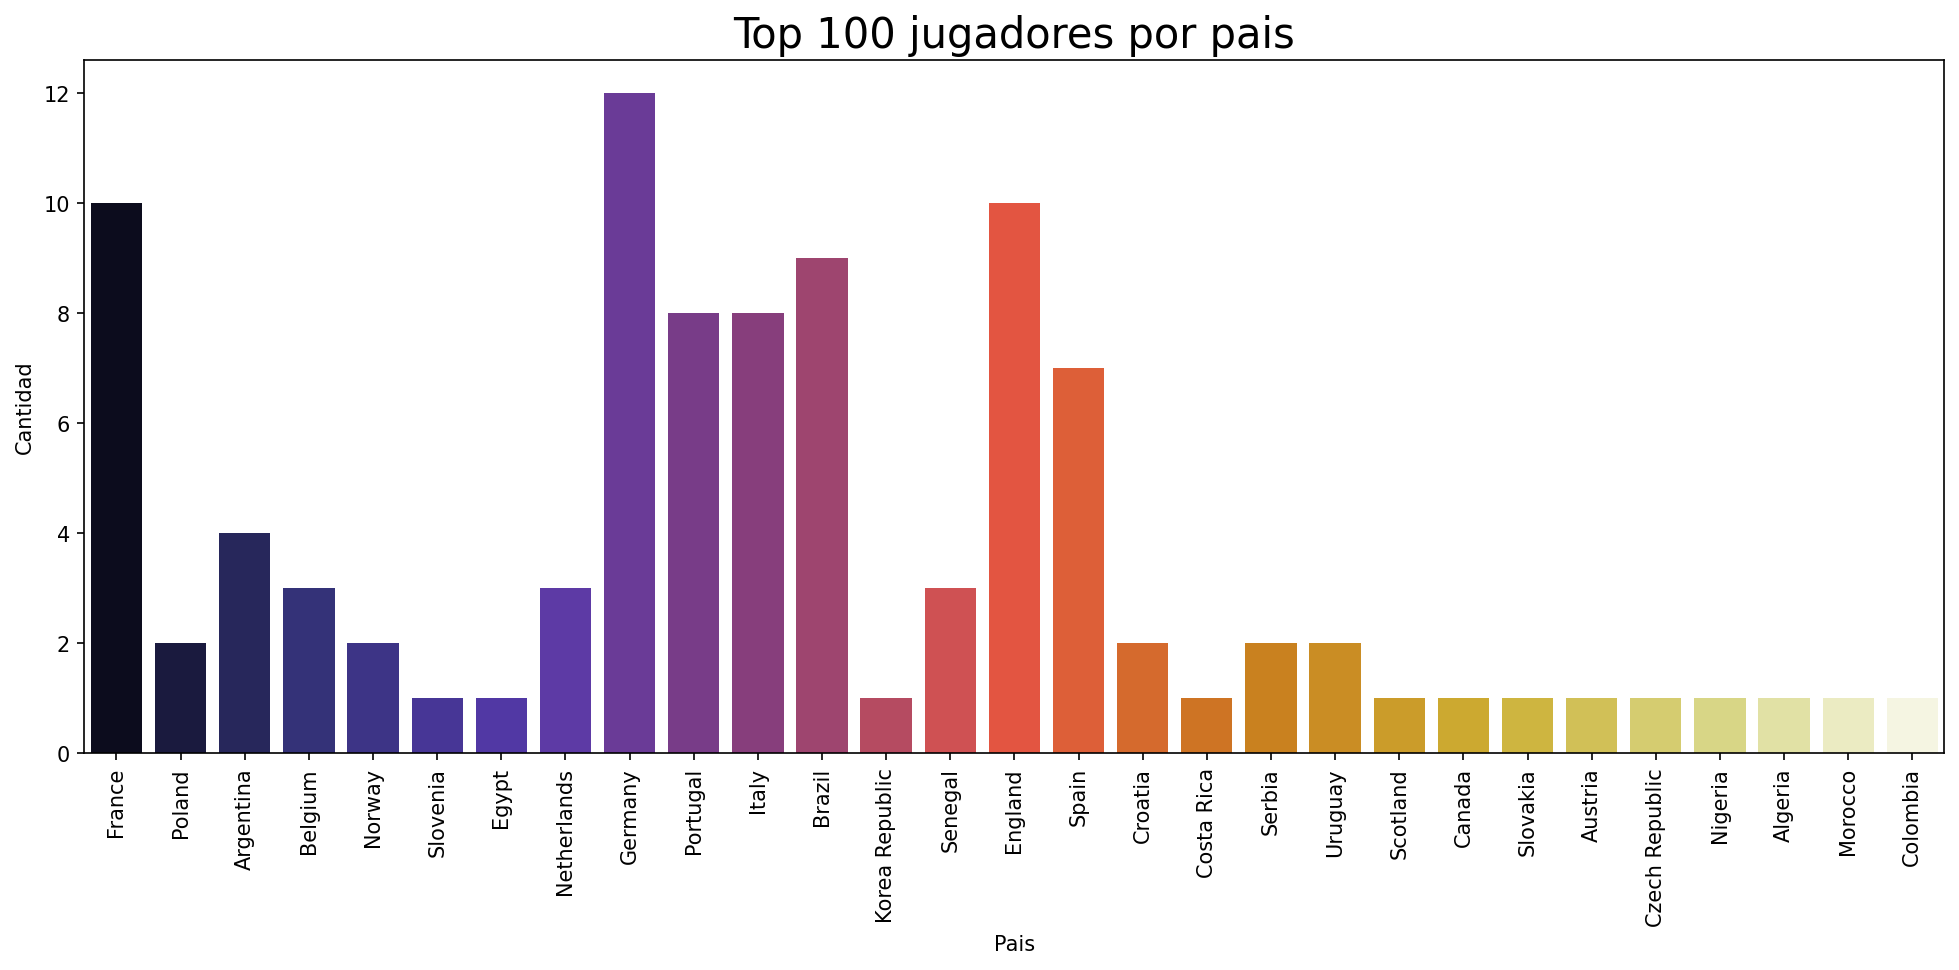

In [13]:
plt.figure(figsize=(16,6),dpi=150)
sns.countplot(x='Pais', data=df.head(100),palette='CMRmap')
plt.xticks(rotation=90)
plt.xlabel('Pais')
plt.ylabel('Cantidad')
plt.title('Top 100 jugadores por pais', fontsize=20)
plt.show()